In [4]:
from custom_dataset import SlidingWindow
import torch
import matplotlib.pyplot as plt
import numpy as np

dataset = SlidingWindow(root='/home/alberto/conditional-diffusion-audio/data/processed_flickr', mode="train")

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

points = []

for step, batch in enumerate(train_dataloader):

    emb = batch["clap_embed"].cpu().detach().numpy()[0][0]
    points.append(emb)

points = np.array(points)
print(points.shape)


Created train dataset with 14831 samples
(14831, 512)


In [5]:
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, init='pca', random_state=0)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(points)
X_tsne = tsne.fit_transform(points)

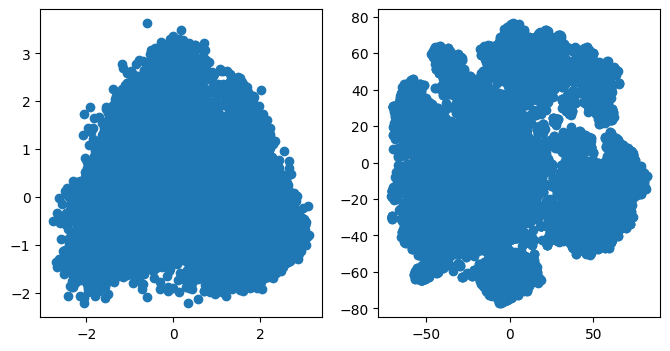

In [6]:
def plot_emb(ax, X, colors=None, names=None):
    # plot data
    ax.scatter(X[:, 0], X[:, 1])
    # for i, txt in enumerate(names):
    #     plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8, xytext=(2, 2), textcoords='offset points')
        
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plot_emb(axes[0], X_pca)
plot_emb(axes[1], X_tsne)
plt.show()